# <span style="color:purple">Insurance cost prediction </span>

#### Data Shapes

In [4]:
import pandas as pd
import numpy as np

from IPython.display import HTML

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("/Users/sonyabudynchak/Desktop/навчання/ІТС/ргр/regression_rgr/pipeline/data/insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

#### Types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Descriptive Statistics

In [9]:
df.describe(include='O') # for categorical variables

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
df.describe(exclude='O') # for numerical variables

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Unique count of brands

In [11]:
# region_n = df['region'].str.split(' ').str[0]
# df.insert(3,"region_n",region_n)


In [12]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [13]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# <span style="color:purple">EDA </span>

In [14]:
%pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


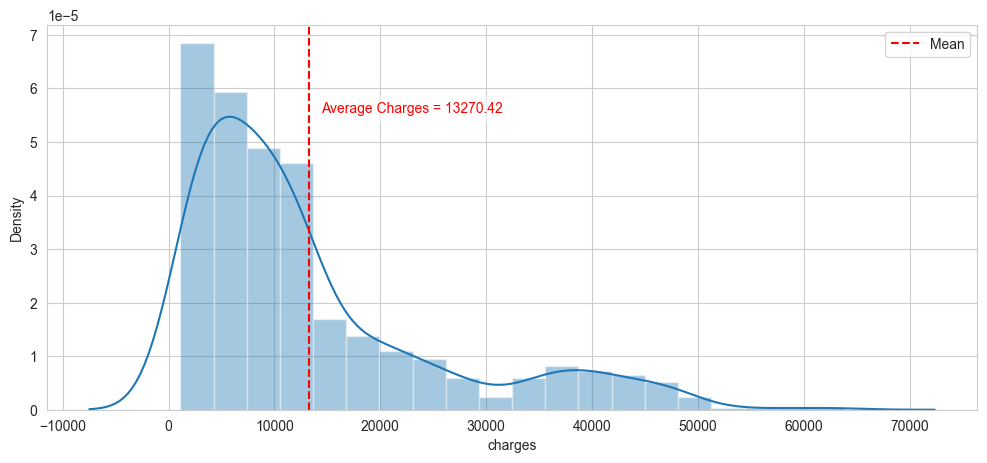

In [15]:

sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

plotd = sns.distplot(df.charges, kde=True, bins=20)

mean_line = plt.axvline(df.charges.mean(), c='red', linestyle='dashed', label='Mean')

plt.text(0.49, 0.8, f'Average Charges = {df.charges.mean():.2f}', transform=plt.gca().transAxes, color='red', fontsize=10,
         verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
plt.legend()
plt.show()


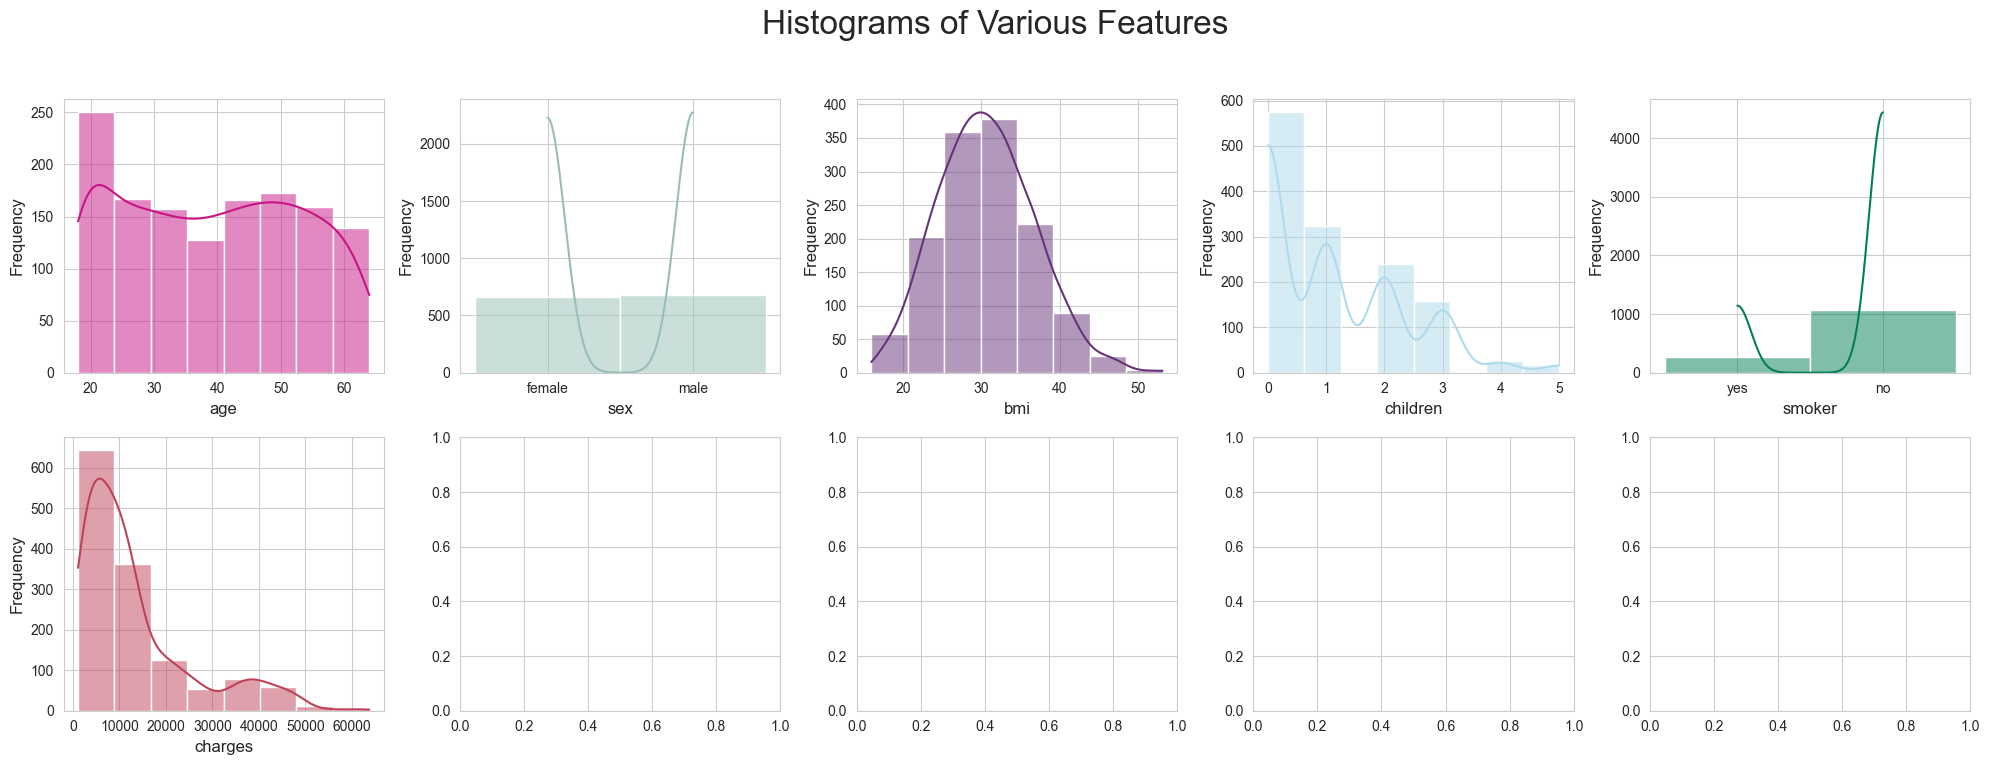

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint

# Assuming df is the DataFrame for your second dataset
# Replace df with the appropriate DataFrame

selected_cols = [col for col in df.columns if col not in ['region']]

colors = ['mediumvioletred']
for i in range(len(selected_cols)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

num_subplots = len(selected_cols)
num_rows = num_subplots // 5 + 1  # Calculate the number of rows needed for subplots
num_cols = min(5, num_subplots)   # Ensure a maximum of 5 columns for subplots

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4), facecolor='white')
fig.suptitle("Histograms of Various Features", size=24)

for i in range(num_rows):  # Iterate over rows
    for j in range(num_cols):  # Iterate over columns
        idx = i * num_cols + j
        if idx < num_subplots:
            sns.histplot(df[selected_cols[idx]], ax=axes[i, j], color=colors[idx], kde=True, bins=8)
            axes[i, j].set_xlabel(selected_cols[idx], fontsize=12)  # Set x-axis label font size
            axes[i, j].set_ylabel("Frequency", fontsize=12)       # Set y-axis label font size

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


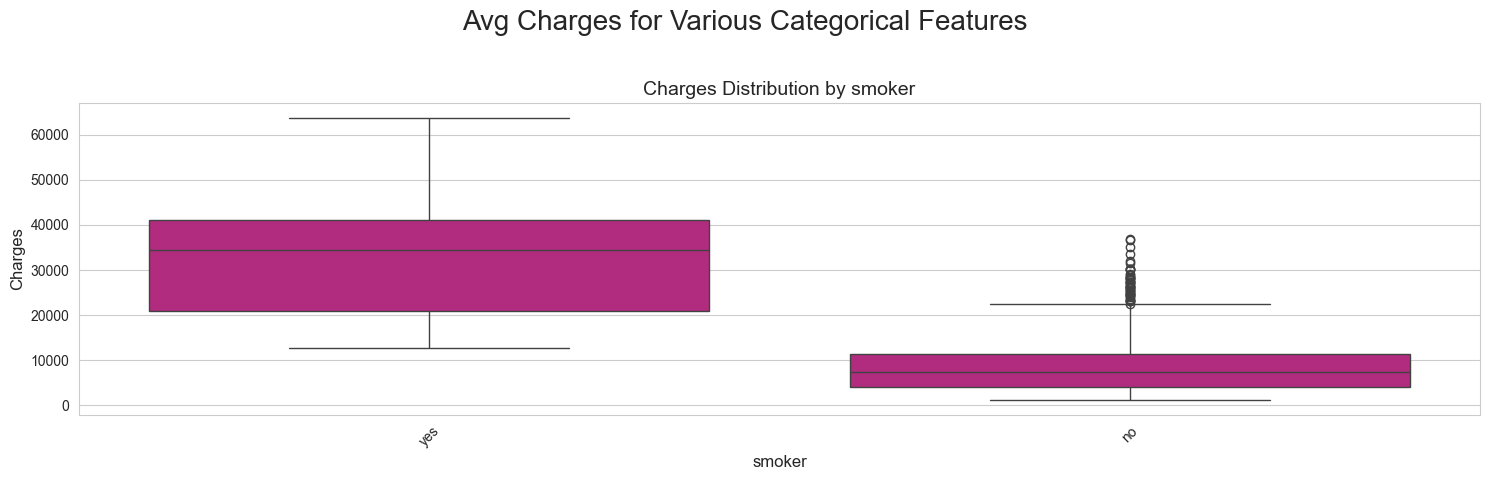

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the DataFrame for your dataset
# Replace df with the appropriate DataFrame

categorical_cols = df.select_dtypes(include=['object']).columns

# Exclude 'sex' and 'region' from categorical columns
selected_cols = [col for col in categorical_cols if col not in ['sex', 'region']]

num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 3 + 1
num_cols = min(3, num_subplots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), facecolor='white')
fig.suptitle("Avg Charges for Various Categorical Features", size=20)

colors = sns.light_palette('mediumvioletred', n_colors=len(selected_cols)+1, reverse=True)

# Ensure axes is a 2D array even if there's only one subplot
axes = axes if isinstance(axes, np.ndarray) else np.array([[axes]])

for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        if idx < num_subplots:
            sns.boxplot(x=selected_cols[idx], y='charges', data=df, ax=axes[i, j], palette=[colors[idx]])
            axes[i, j].set_title(f'Charges Distribution by {selected_cols[idx]}', fontsize=14)
            axes[i, j].set_xlabel(selected_cols[idx], fontsize=12)
            axes[i, j].set_ylabel("Charges", fontsize=12)
            axes[i, j].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


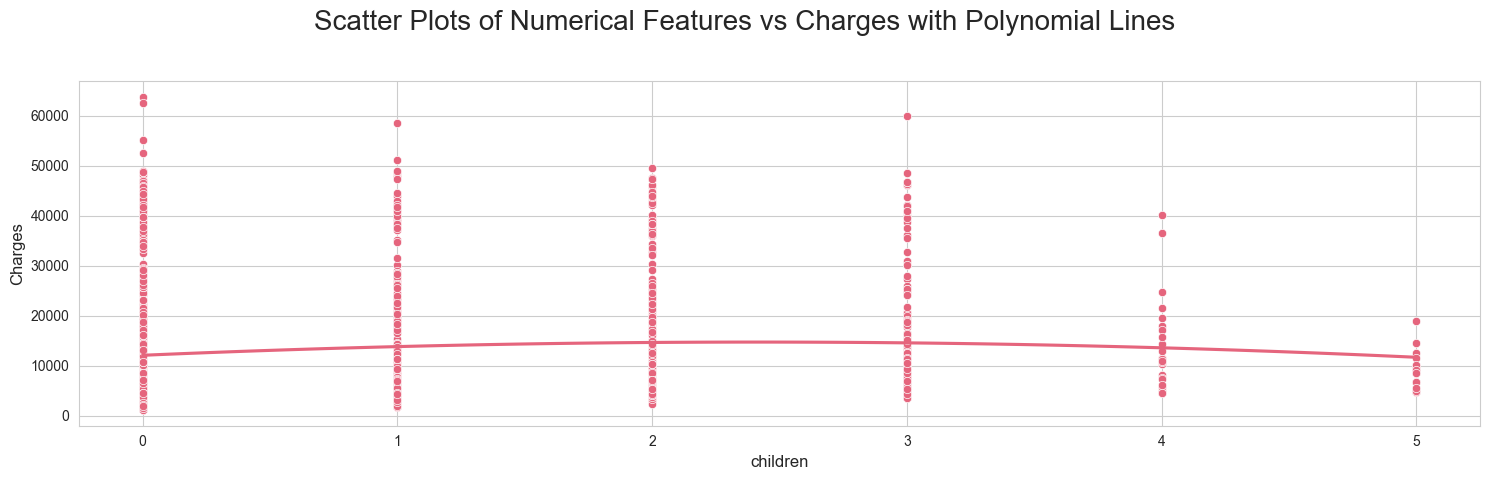

In [18]:

# Assuming df is the DataFrame for your dataset
# Replace df with the appropriate DataFrame

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude 'charges' from numerical columns
selected_cols = [col for col in numerical_cols if col not in ['age', 'bmi', 'charges']]

num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 3 + 1
num_cols = min(3, num_subplots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), facecolor='white')
fig.suptitle("Scatter Plots of Numerical Features vs Charges with Polynomial Lines", size=20)

palette = sns.husl_palette(n_colors=len(selected_cols), s=0.7, l=0.6)

# Ensure axes is a 2D array even if there's only one subplot
if isinstance(axes, np.ndarray):
    axes = axes
else:
    axes = np.array([[axes]])

for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        if idx < num_subplots:
            sns.scatterplot(x=selected_cols[idx], y='charges', data=df, ax=axes[i, j], color=palette[idx])

            sns.regplot(x=selected_cols[idx], y='charges', data=df, ax=axes[i, j], scatter=False, order=2, color=palette[idx], ci=None)

            axes[i, j].set_xlabel(selected_cols[idx], fontsize=12)
            axes[i, j].set_ylabel("Charges", fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# <span style="color:purple">Feature Engineering </span>

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import MinMaxScaler
from feature_engine.encoding import OneHotEncoder

# Split the DataFrame into features (X) and target (y)
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]  # Select appropriate feature columns
y = df['charges']  # Define the target variable

categorical_columns = ['sex', 'smoker', 'region']  # Specify categorical columns

# Define the feature engineering pipeline
feature_engineering_pipeline = Pipeline([
    ('encoder', OneHotEncoder(top_categories=10,
                               ignore_format=True,
                               drop_last=True,
                               drop_last_binary=True,
                               variables=categorical_columns)),  # One-hot encode categorical variable
    ('scaler', SklearnTransformerWrapper(MinMaxScaler())),  # Standardize variables
])


In [22]:
# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = feature_engineering_pipeline.fit_transform(X_train)

X_test = feature_engineering_pipeline.transform(X_test)


In [23]:

import time
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error

lm = LinearRegression()
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)
xgbt = xgb.XGBRegressor(random_state = 42)
dtree = DecisionTreeRegressor(random_state = 42)

algo = [xgbt,lm,ridge,lasso,knn,rf,dtree]

result = []

for i in algo:
        start = time.process_time()
        ml_model = i.fit(X_train,y_train)
        result.append([str(i).split("(")[0] + str("_baseline"), ml_model.score(X_train, y_train), ml_model.score(X_test, y_test),
                  np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train))),
                  np.sqrt(mean_squared_error(y_test, ml_model.predict(X_test))),
                  mean_absolute_error(y_train, ml_model.predict(X_train)),
                  mean_absolute_error(y_test, ml_model.predict(X_test))])
        print(str(i).split("(")[0],"✓    ", "{}".format(round(time.process_time()-start,3)),"sec")

result = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae"]).sort_values("Test_Rmse").set_index("Algorithm")
result

XGBRegressor ✓     0.609 sec
LinearRegression ✓     0.203 sec
Ridge ✓     0.132 sec
Lasso ✓     0.93 sec
KNeighborsRegressor ✓     0.849 sec
RandomForestRegressor ✓     0.809 sec
DecisionTreeRegressor ✓     0.012 sec


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae
Algorithm,,,,,,
RandomForestRegressor_baseline,0.974905,0.864076,1903.162802,4593.690758,1030.894435,2562.612107
XGBRegressor_baseline,0.994533,0.855338,888.335806,4739.054501,474.473987,2602.878740
KNeighborsRegressor_baseline,0.843131,0.786020,4758.305794,5763.684802,2817.272501,3599.650979
Lasso_baseline,0.741725,0.783518,6105.553635,5797.283241,4206.985723,4180.784697
Ridge_baseline,0.741661,0.783186,6106.303554,5801.738411,4201.253315,4174.899306
LinearRegression_baseline,0.741289,0.781673,6110.706296,5821.940500,4215.122050,4209.986832
DecisionTreeRegressor_baseline,0.998308,0.694700,494.205984,6884.583662,29.572515,3355.257796


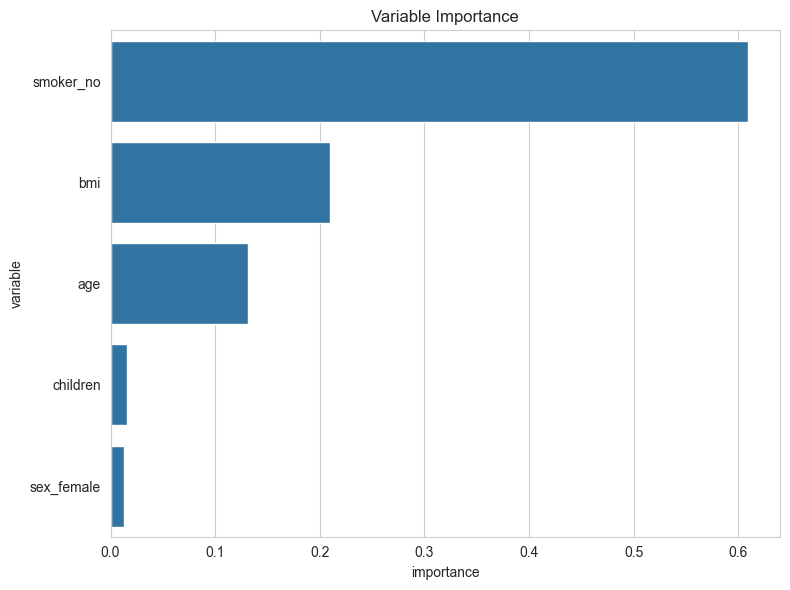

In [24]:
rankings = ml_model.feature_importances_.tolist()
importance = pd.DataFrame(sorted(zip(X_train.columns,rankings),reverse=True),columns=["variable","importance"]).sort_values("importance",ascending = False)

plt.figure(figsize=(8,6))
sns.barplot(x="importance",
            y="variable",
            data=importance[:5])
plt.title('Variable Importance')
plt.tight_layout()

In [25]:
from sklearn.model_selection import GridSearchCV

# Визначення простору параметрів
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Створення моделі
rf = RandomForestRegressor(random_state=42)

# Визначення крос-валідації
cv = 5  # Наприклад, 5-кратна крос-валідація

# Пошук оптимальних гіперпараметрів
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Отримання результатів
best_params = grid_search.best_params_
best_score = -grid_search.best_score_




In [26]:
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X_train.columns

# Створення DataFrame з важливістю ознак
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Сортування за зменшенням важливості
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Вивід топ-5 найважливіших ознак
top_features = feature_importance_df.head(5)
print(top_features)


      Feature  Importance
4   smoker_no    0.608618
1         bmi    0.213303
0         age    0.134355
2    children    0.019638
3  sex_female    0.006858
